In [12]:
import numpy as np
from sklearn.manifold.forests import *
from sklearn.manifold import SpectralEmbedding
from time import time

#### AffinityForestSKlearnXX
Calling sklearn.ensemble.RandomForestRegressor with fit_transform(X,X) and criterion='mse' 

#### AffinityForestNaive
Our own first implementation that computes gaussian entropy. Assumes a fully populated binary tree.

#### AffinityForestNaiveRecursive
Own implementation using the same Splitter as above but due to rekursive tree building allows for not fully populated trees. (node with <= 1 samples is not split any more)

In [13]:
data = np.random.rand(300, 5)
# np.seterr(all='raise')

In [14]:
n_trees = 10
depth = 7
n_options = 50
n_features = 3


afSkl = AffinityForestSKlearnXX(n_trees, depth)
afRek = AffinityForestNaiveRecursive(n_trees, depth, n_options, n_features)
afNai = AffinityForestNaive(n_trees, depth, n_options, n_features)

t0 = time()
sklAffinity = afSkl.fit_transform(data)
t1 = time()
print("sklAffinityForest took {:.2f}s".format(t1-t0))

t1 = time()
rekAffinity = afRek.fit_transform(data)
t2 = time()
print("rekursive Affinity Forest took {:.2f}s".format(t2-t1))

t2 = time()
naiAffinity = afNai.fit_transform(data)
t3 = time()
print("naive affinity forest took {:.2f}s".format(t3-t2))

sklAffinityForest took 0.07s
rekursive Affinity Forest took 14.42s


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


naive affinity forest took 18.49s


In [4]:
print("naiveRekursive vs naiveFullBinary {:>.3f}".format(np.mean(np.abs(rekAffinity-naiAffinity))))
print("skl vs naiveFullBinary            {:>.3f}".format(np.mean(np.abs(sklAffinity-naiAffinity))))
print("skl vs naiveRekursive             {:>.3f}".format(np.mean(np.abs(sklAffinity-rekAffinity))))


naiveRekursive vs naiveFullBinary 0.141
skl vs naiveFullBinary            0.150
skl vs naiveRekursive             0.204


In [91]:
from sklearn import datasets
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

def evaluate(embedder, datasetFunction=datasets.samples_generator.make_swiss_roll, n_points=1000):
    X, groundTruth = datasetFunction(n_points)
        
    predicted = embedder.fit_transform(X)
    
    Axes3D
    fig = plt.figure(figsize=(15, 8))
    plt.suptitle("Left: origial, Right Embedding: {}".format(embedder))

    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=groundTruth, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=predicted, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)

    plt.show() 
    
class PrecomputedEmbeder:
    def __init__(self, affinityClass, params, embedingClass):
        self.affinityClass = affinityClass
        self.embeder = embedingClass(n_components=1, affinity='precomputed')
        self.params = params
        
    def fit_transform(self, X):
        affinityComputer = self.affinityClass(**self.params)
        affinity = affinityComputer.fit_transform(X)
        
        return self.embeder.fit_transform(affinity)
    
    def __str__(self):
        return "PrecomputedEmbeder affinity= {}({}),\n embeding= {}".format(self.affinityClass.__name__, self.params, self.embeder.__class__)
        
        
n_trees = 15
depth = 7
n_options = 80
n_features = 2       
        
ForestEmbeddingSKlearn = PrecomputedEmbeder(AffinityForestSKlearnXX, dict(n_estimators=n_trees, max_depth=depth), SpectralEmbedding)
ForestEmbeddingRekursive = PrecomputedEmbeder(AffinityForestNaiveRecursive, dict(num_trees=n_trees, depth=depth, num_options=n_options, num_features=n_features), SpectralEmbedding)
ForestEmbeddingNaive = PrecomputedEmbeder(AffinityForestNaive, dict(num_trees=n_trees, depth=depth, num_options=n_options, num_features=n_features), SpectralEmbedding)

print(ForestEmbeddingSKlearn)

PrecomputedEmbeder affinity= AffinityForestSKlearnXX({'max_depth': 7, 'n_estimators': 15}),
 embeding= <class 'sklearn.manifold.spectral_embedding_.SpectralEmbedding'>


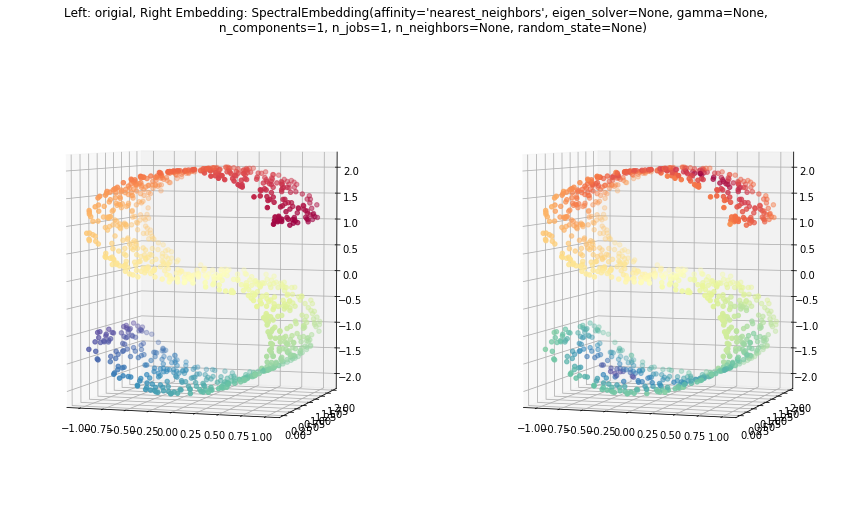

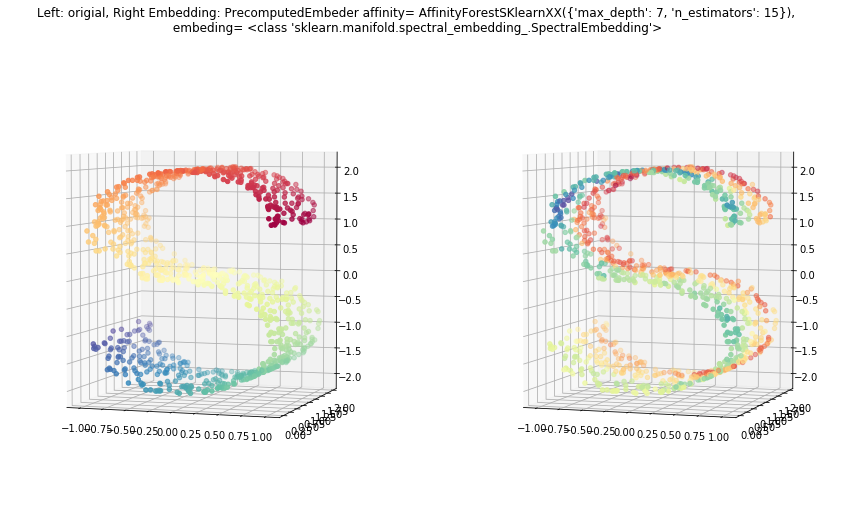

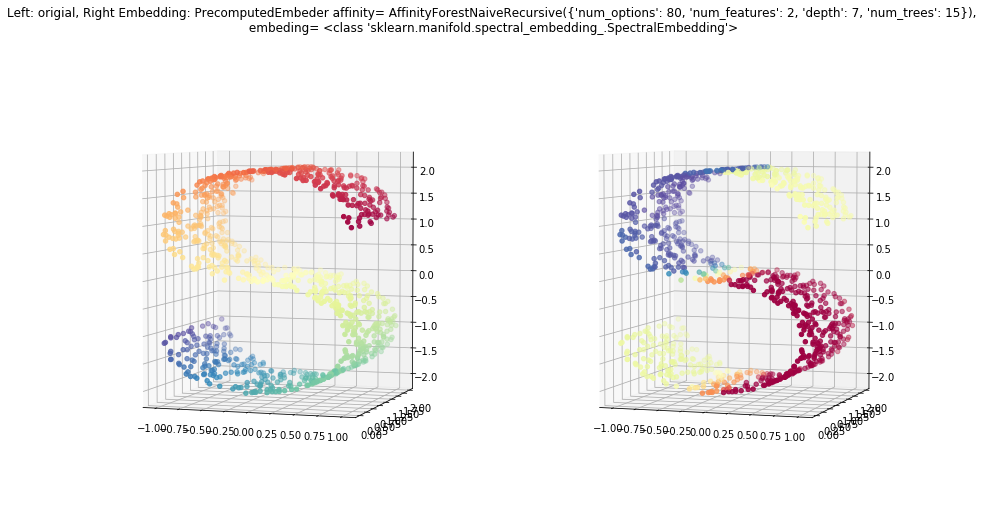

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/shakti/Documents/uniSkripte/Ensemble methods/finalProject/scikit-learn/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


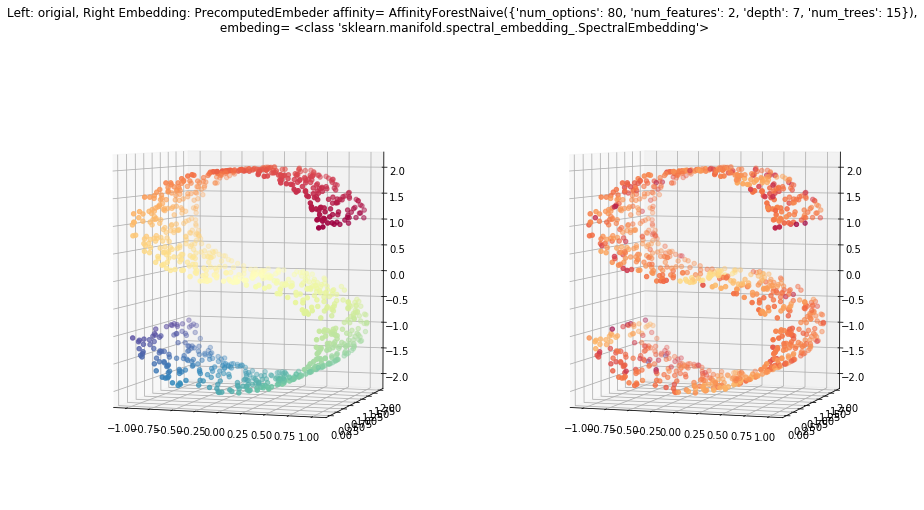

In [92]:
dataset = datasets.samples_generator.make_s_curve

#evaluate raw
evaluate(SpectralEmbedding(n_components=1, affinity="nearest_neighbors"), dataset)

evaluate(ForestEmbeddingSKlearn, dataset)

evaluate(ForestEmbeddingRekursive, dataset)

evaluate(ForestEmbeddingNaive, dataset)

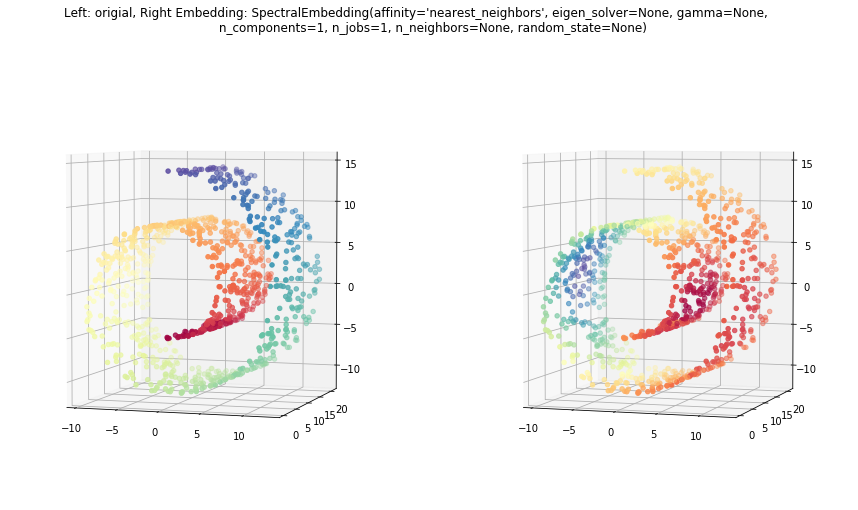

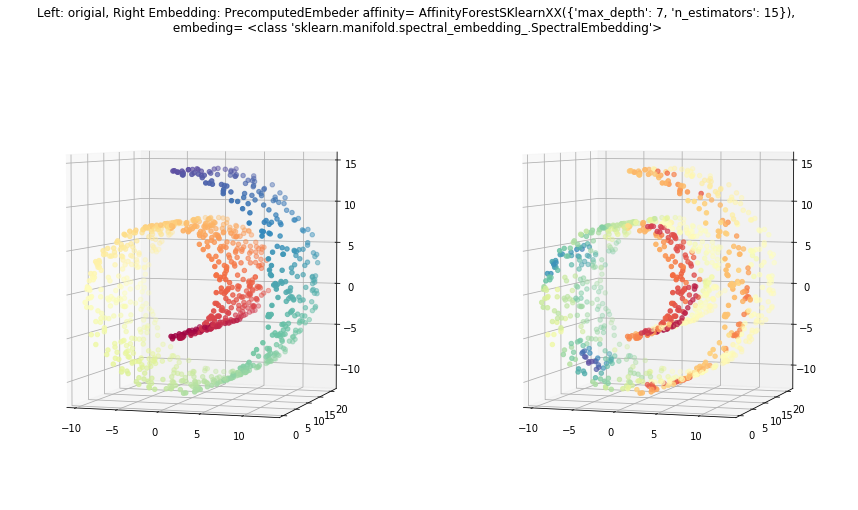

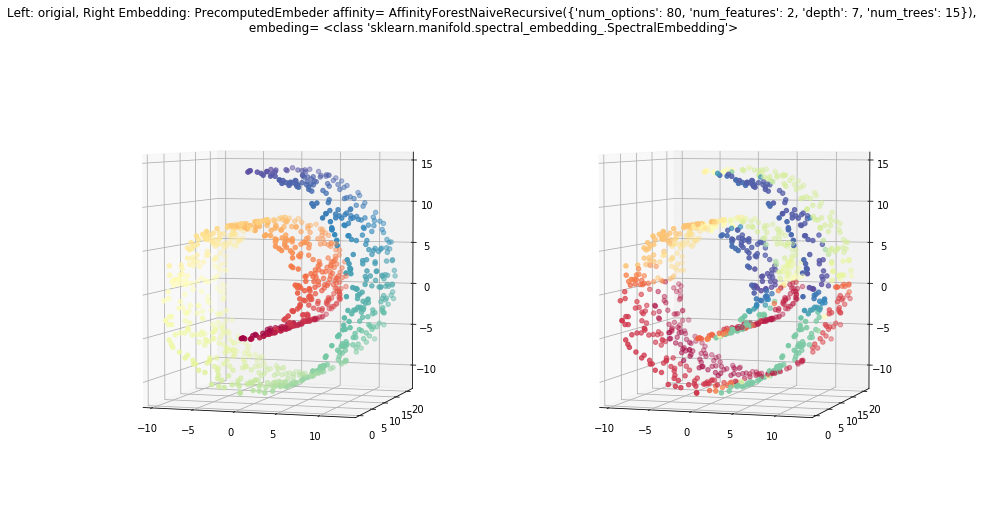

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


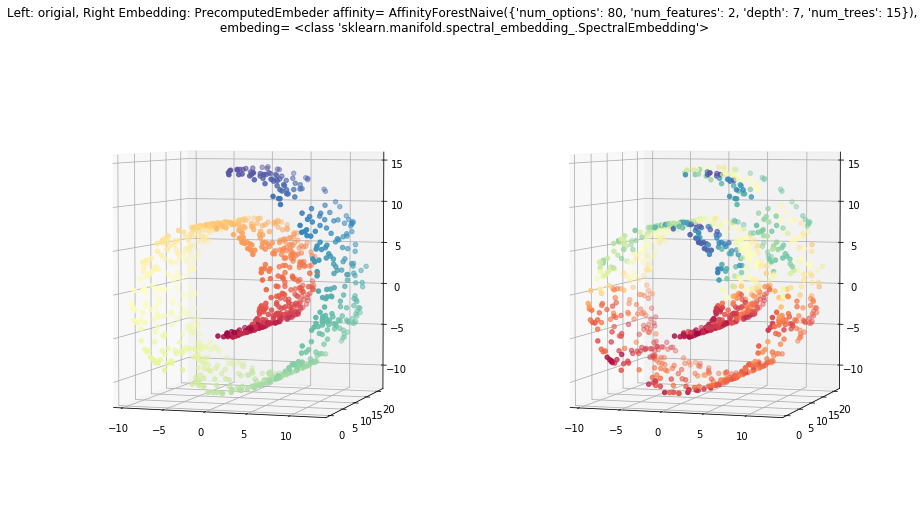

In [93]:
dataset = datasets.samples_generator.make_swiss_roll

#evaluate raw
evaluate(SpectralEmbedding(n_components=1, affinity="nearest_neighbors"), dataset)

evaluate(ForestEmbeddingSKlearn, dataset)

evaluate(ForestEmbeddingRekursive, dataset)

evaluate(ForestEmbeddingNaive, dataset)